In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [2]:
df_full = pd.read_csv('data/tweets_users_august.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [3]:
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [4]:
df_full.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,...,following,likes,url,verified,geotext,city,country,iso3,month,day
0,2020-08-10 20:32:47,PodRevDay,LizWilcox79,0,0,4,"ohhh, thats a dangerous bit of info. I am terr...",NaN,NaN,NaN,...,504,475,http://podrevday.com,0,<geotext.geotext.GeoText object at 0x7f9021d85...,NaN,NaN,NaN,8,10
1,2018-11-27 19:38:45,FarandWidecom,NaN,26,43,199,How many of these have you ever been to?,NaN,NaN,NaN,...,16,2,https://www.farandwide.com/,0,<geotext.geotext.GeoText object at 0x7f90218a3...,NaN,NaN,NaN,11,27
2,2020-08-10 20:07:39,LizWilcox79,PodRevDay,1,0,4,"You can mark episodes as ""listened"" on Podchas...",NaN,NaN,NaN,...,351,6580,https://www.briarbooklane.com/,0,<geotext.geotext.GeoText object at 0x7f90218a3...,NaN,NaN,NaN,8,10
3,2020-08-10 19:59:17,PodRevDay,podcast_junkies,0,0,0,"omg, you did it. ((((dancing))))",NaN,NaN,NaN,...,504,475,http://podrevday.com,0,<geotext.geotext.GeoText object at 0x7f9021d85...,NaN,NaN,NaN,8,10
4,2020-08-10 19:58:39,PodRevDay,VincentMacElroy,1,0,0,What's this podcast tracking website? Would lo...,NaN,NaN,NaN,...,504,475,http://podrevday.com,0,<geotext.geotext.GeoText object at 0x7f9021d85...,NaN,NaN,NaN,8,10


In [5]:
df_full.username.value_counts()[:5]

PodRevDay        265
stephfuccio      218
FarandWidecom     67
musciguy          50
LizWilcox79       33
Name: username, dtype: int64

In [6]:
screen = ['PodRevDay', 'stephfuccio', 'FarandWidecom']

df_full = df_full[~df_full.username.isin(screen)]

In [7]:
df_full.username.value_counts()[:10]

musciguy           50
LizWilcox79        33
Podchaser          32
Infectious_Pod     29
LiqeaH             21
curichildpod       18
ToneDeafMusical    17
FitVeritas         17
DimensionPod       16
PersuadePod        15
Name: username, dtype: int64

In [8]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followers)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweets)
avg_favorite = np.mean(df_full.favorites)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participted in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Averge Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

934: Tweets using the hashtag #PodRevDay.
326: People have participted in #PodRevDay.
575,430: Followers of participants in #PodRevDay.
17: Minimum number of countries with participants.
6.12: Averge Number of people liking a tweet about #PodRevDay
2.18: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [9]:
!mkdir plots

mkdir: cannot create directory ‘plots’: File exists


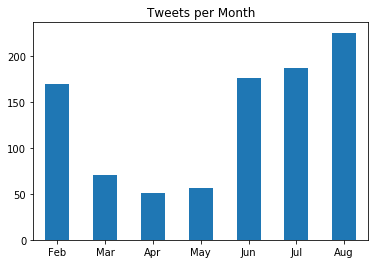

In [10]:
tweets_per_month = df_full.groupby('month').count().sort_values('month', ascending=True).reset_index()

months = ('Feb', "Mar", "Apr", 'May', "Jun", "Jul", 'Aug')
positions = (0, 1, 2, 3, 4, 5, 6)

ax = tweets_per_month.plot.bar(x='month', 
                          y='date', 
                          title="Tweets per Month",
                          legend=None)
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

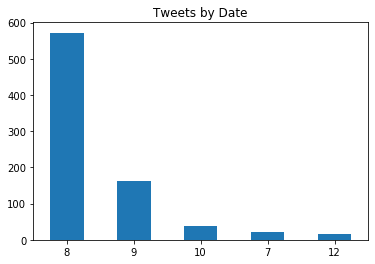

In [11]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

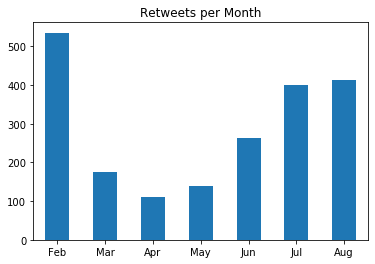

In [12]:
retweets_per_month = df_full.groupby(['month'])['retweets'].sum().sort_index(ascending=True)
ax3 = retweets_per_month.plot.bar(title="Retweets per Month")
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax3.figure.savefig('plots/retweets_per_month.png')

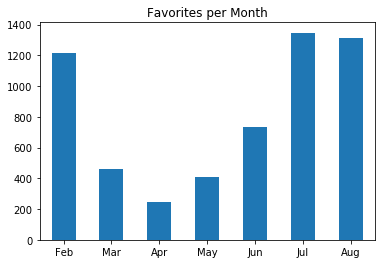

In [13]:
favorites_per_month = df_full.groupby(['month'])['favorites'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

In [14]:
table = df_full.groupby(['month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [20]:
table_wide = table.pivot(index='month',
                               columns='country',
                               values=['total']).fillna(method='ffill', axis=0)

table_wide = (table_wide.append(pd.Series(name=1))
              .sort_index())

/home/evan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


In [22]:
table_wide.fillna(0, inplace=True)
table_wide

total                                                     \
country Australia Canada Ecuador France Germany India Italy Malaysia   
month                                                                  
1             0.0    0.0     0.0    0.0     0.0   0.0   0.0      0.0   
2             5.0    2.0     0.0    0.0     0.0   0.0   6.0      2.0   
3             5.0    2.0     1.0    0.0     0.0   0.0   6.0      2.0   
4             6.0    2.0     1.0    0.0     0.0   0.0   6.0      2.0   
5             6.0    3.0     1.0    0.0     1.0   0.0   6.0      2.0   
6             6.0    4.0     1.0    0.0     2.0   3.0   6.0      2.0   
7             6.0   10.0     1.0    2.0     4.0   3.0   6.0      2.0   
8             6.0   26.0     1.0    2.0     4.0   3.0   9.0      2.0   

                                                               \
country New Zealand Nigeria Poland Serbia South Africa Sweden   
month                                                           
1               0.0     0.0    0.0    0.0          0.0    0.0   
2               3.0     0.0    0.0    0.0          0.0    0.0   
3               4.0     0.0    0.0    0.0          0.0    0.0   
4               4.0     0.0    0.0    0.0          0.0    0.0   
5               5.0     0.0    0.0    0.0          0.0    0.0   
6               5.0     3.0    1.0    0.0          6.0    0.0   
7               6.0     4.0    4.0    1.0          6.0    0.0   
8               6.0     4.0    5.0    2.0          6.0    2.0   

                                                           
country United Arab Emirates United Kingdom United States  
month                                                      
1                        0.0            0.0           0.0  
2                        0.0            6.0          40.0  
3                        0.0           12.0          69.0  
4                        0.0           14.0          90.0  
5                        0.0           21.0         115.0  
6                        0.0           48.0         185.0  
7                        0.0           69.0         230.0  
8                        3.0           72.0         325.0

In [23]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [24]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [25]:
mon_num = list(range(1,9))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August']

months_dic = dict(zip(mon_num, mon_names))
table_wide.rename(index=months_dic, inplace=True)
table_wide

,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,Serbia,South Africa,Sweden,United Arab Emirates,United Kingdom,United States
month,,,,,,,,,,,,,,,,,
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
January,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
February,5.0,2.0,0.0,0.0,0.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,40.0
February,5.0,2.0,0.0,0.0,0.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,40.0
March,5.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,69.0
March,5.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,69.0
April,6.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,90.0
April,6.0,2.0,1.0,0.0,0.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,90.0
May,6.0,3.0,1.0,0.0,1.0,0.0,6.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,115.0


In [26]:
bcr.bar_chart_race(df=table_wide,
                   period_length=500,
                   filename="plots/podrevday.gif")

In [27]:
bcr.bar_chart_race(df=table_wide,
                   period_length=1250,
                   filename="plots/podrevday.mp4")